In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Natančnost numeričnih odvodov

Pokažite, da velja

Forward differences
$$ f'(x)=\frac{f(x+h)-f(x)}{h}+\mathcal{O}(h) $$

Backward differences
$$ f'(x)=\frac{f(x)-f(x-h)}{h}+\mathcal{O}(h) $$

Central differences
$$ f'(x)=\frac{f(x+h)-f(x-h)}{2h}+\mathcal{O}(h^2) $$

Centralni odvod je torej praviloma najbolj natančen, ko ga je mogoče implementirati.

Hint: Uporabite Taylorjev razvoj.

Taylorjev razvoj:

$$f(x+h)=f(x)+f'(x)h+\frac{1}{2}f''(x)h^2+\frac{1}{6}f'''(x)h^3+\dots$$

$$f(x-h)=f(x)-f'(x)h+\frac{1}{2}f''(x)h^2-\frac{1}{6}f'''(x)h^3\pm\dots$$

Pri centralnem odvodu se $f''(x)$ člen odšteje.

# 2. Hitrost, pospešek

V priloženi datoteki Vaja2_podatki.dat so podatki o lokaciji delca ob različnih časih

In [3]:
data = np.loadtxt("Vaja2_domaca_naloga_podatki.dat")

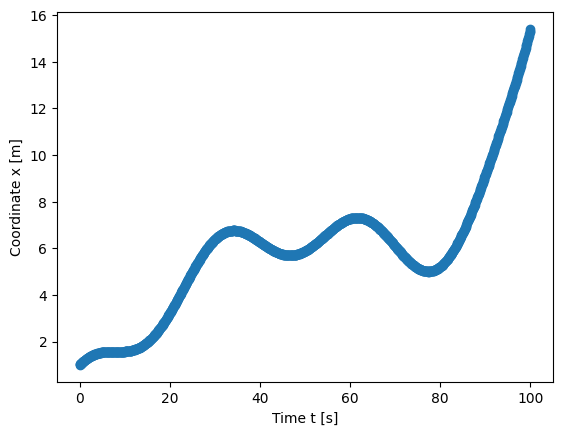

In [4]:
plt.xlabel('Time t [s]')
plt.ylabel('Coordinate x [m]')
plt.scatter(data[:,0],data[:,1])

Izračunajte hitrost $v(t)=\dot{x}(t)$ in pospešek $a(t)=\ddot{x}(t)$ za podatke $(t_i,x_i)$ za $i=0,\dots,1000$.

1. Izračunajte $v_i$ in $a_i$ z uporabo forward-differences in central-differences metod
2. Najdite maksimalno vrednost pospeška in pripadajoč čas

Pozor: za razliko od primera na vajah ne poznamo funkcijske odvisnosti spremenljivk, temveč samo podatke. Modificirajte funkcijo iz vaj za diskretne podatke.

In [5]:
def forward(data):
    derive = np.zeros(len(data[:,1]))
    derive[:-1] = (data[1:,1]-data[:-1,1]) / (data[1:,0]-data[:-1,0])
    # zadnji element uporabi backwards metodo
    derive[-1] = (data[-1,1]-data[-2,1]) / (data[-1,0]-data[-2,0])
    return np.transpose([data[:,0],derive])

In [6]:
velocityForward = forward(data)
accelerationForward = forward(forward(data))

In [7]:
def central(data):
    derive = np.zeros(len(data[:,1]))
    derive[1:-1] = (data[2:,1]-data[:-2,1]) / (data[2:,0]-data[:-2,0])
    # prvi element uporabi forward metodo
    derive[0] = (data[1,1]-data[0,1]) / (data[1,0]-data[0,0])
    # zadnji element uporabi backwards metodo
    derive[-1] = (data[-1,1]-data[-2,1]) / (data[-1,0]-data[-2,0])
    return np.transpose([data[:,0],derive])

In [8]:
velocityCentral = central(data)
accelerationCentral = central(central(data))

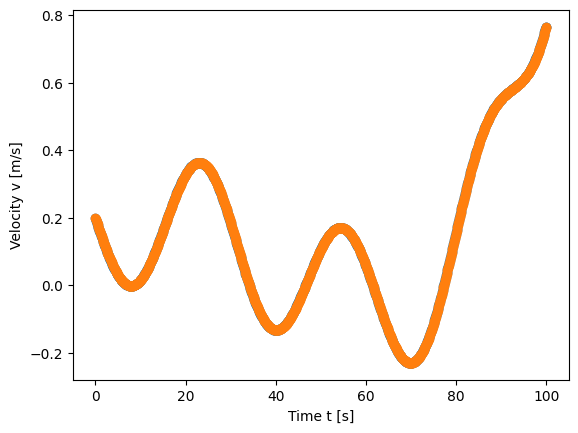

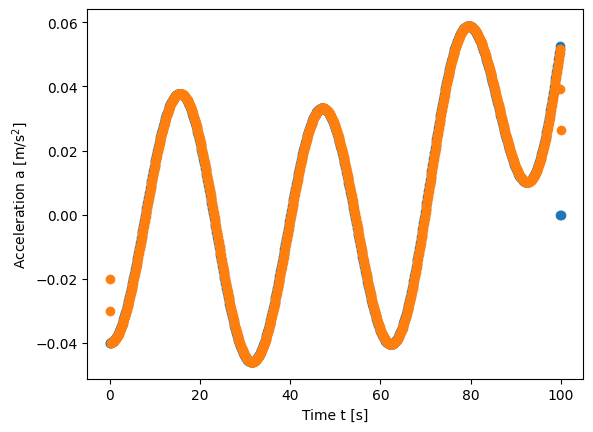

In [9]:
plt.xlabel('Time t [s]')
plt.ylabel('Velocity v [m/s]')
plt.scatter(velocityForward[:,0],velocityForward[:,1])
plt.scatter(velocityCentral[:,0],velocityCentral[:,1])
plt.show()

plt.xlabel('Time t [s]')
plt.ylabel('Acceleration a [m/s$^2$]')
plt.scatter(accelerationForward[:,0],accelerationForward[:,1])
plt.scatter(accelerationCentral[:,0],accelerationCentral[:,1])
plt.show()

Brez nenatančnih točk

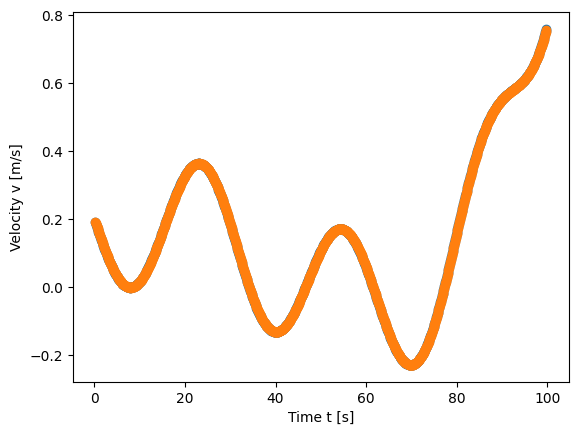

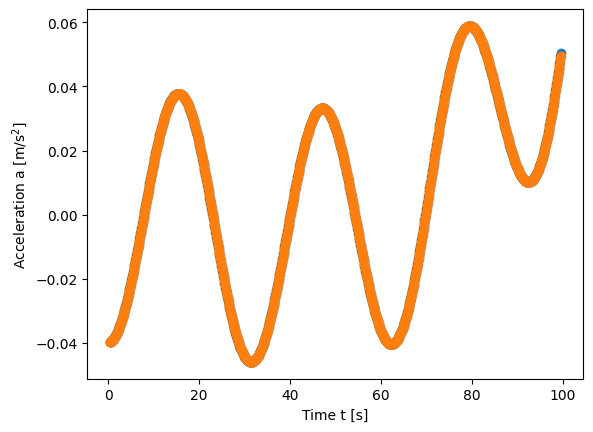

In [10]:
plt.xlabel('Time t [s]')
plt.ylabel('Velocity v [m/s]')
plt.scatter(velocityForward[2:-2,0],velocityForward[2:-2,1])
plt.scatter(velocityCentral[2:-2,0],velocityCentral[2:-2,1])
plt.show()

plt.xlabel('Time t [s]')
plt.ylabel('Acceleration a [m/s$^2$]')
plt.scatter(accelerationForward[4:-4,0],accelerationForward[4:-4,1])
plt.scatter(accelerationCentral[4:-4,0],accelerationCentral[4:-4,1])
plt.show()

## Maksimalni pospešek

In [11]:
accelerationMax = max( accelerationCentral[:,1] )
indexAccelerationMax = np.argmax( accelerationCentral[:,1] )
timeAccelerationMax = accelerationCentral[indexAccelerationMax,0]

In [12]:
print(accelerationMax)
print(indexAccelerationMax)
print(timeAccelerationMax)

0.05889334508810517
796
79.60000000000001
